To-do list:

* win-stay lose-switch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import log_softmax
from scipy.optimize import minimize

In [14]:
animal_data = pd.read_csv('../sample_data/MAB_test_run_system_12_G5-G8_21012022-22.01.23_PROCESSED.csv')

In [15]:
ids = animal_data['animalID'].unique()
animal_data.sort_values(by=['animalID', 'session', 'trial'], inplace=True)

animal_data.insert(3, 'trialTotal', np.NaN)
animal_data['trialTotal']  = animal_data.groupby('animalID').cumcount()+1

animal_data.insert(4, 'trialByScenario', np.NaN)
animal_data['trialByScenario']  = animal_data.groupby(['animalID', 'scenario']).cumcount()+1

In [16]:
animal_data.groupby('scenario')[['P1', 'P2', 'P3']].max()

,P1,P2,P3
scenario,,,
Scenario 1,0.8,0.2,0.2
Scenario 2,0.8,0.2,0.2


In [17]:
animal_data

,animalID,session,scenario,trialTotal,trialByScenario,trial,trialStart,trialEnd,trialDuration,startLatency,P1,P2,P3,decisionNumber,decisionPosition,decisionImage,decisionLatency,reward,rewardLatency
0,G5,1,Scenario 1,1,1,1,2022-01-23 16:40:16.249999872,2022-01-23 16:40:47.820000000,31.57,6.97,0.8,0.2,0.2,1,3,6,10.38,True,16.19
1,G5,1,Scenario 1,2,2,2,2022-01-23 16:40:54.820000000,2022-01-23 16:41:08.289999872,13.47,0.00,0.8,0.2,0.2,1,3,6,6.18,True,2.28
2,G5,1,Scenario 1,3,3,3,2022-01-23 16:41:15.630000128,2022-01-23 16:41:22.020000000,6.39,0.35,0.8,0.2,0.2,1,3,6,6.39,False,NaN
3,G5,1,Scenario 1,4,4,4,2022-01-23 16:41:35.589999872,2022-01-23 16:41:50.200000000,14.61,6.57,0.8,0.2,0.2,1,3,6,3.32,True,6.29
4,G5,1,Scenario 1,5,5,5,2022-01-23 16:42:01.509999872,2022-01-23 16:42:17.970000128,16.46,4.31,0.8,0.2,0.2,1,3,6,9.99,True,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,G8,8,Scenario 2,397,174,52,2022-01-25 10:36:46.320000000,2022-01-25 10:36:48.490000128,2.17,7.78,0.8,0.2,0.2,1,2,6,2.17,False,NaN
1699,G8,8,Scenario 2,398,175,53,2022-01-25 10:36:56.660000000,2022-01-25 10:36:59.069999872,2.41,1.17,0.8,0.2,0.2,3,1,4,2.41,False,NaN
1700,G8,8,Scenario 2,399,176,54,2022-01-25 10:37:55.960000000,2022-01-25 10:38:05.940000000,9.98,49.89,0.8,0.2,0.2,2,3,5,2.31,True,2.67
1701,G8,8,Scenario 2,400,177,55,2022-01-25 10:39:34.309999872,2022-01-25 10:39:37.040000000,2.73,81.37,0.8,0.2,0.2,3,1,4,2.73,False,NaN


In [18]:
path = '3'

## All Trials

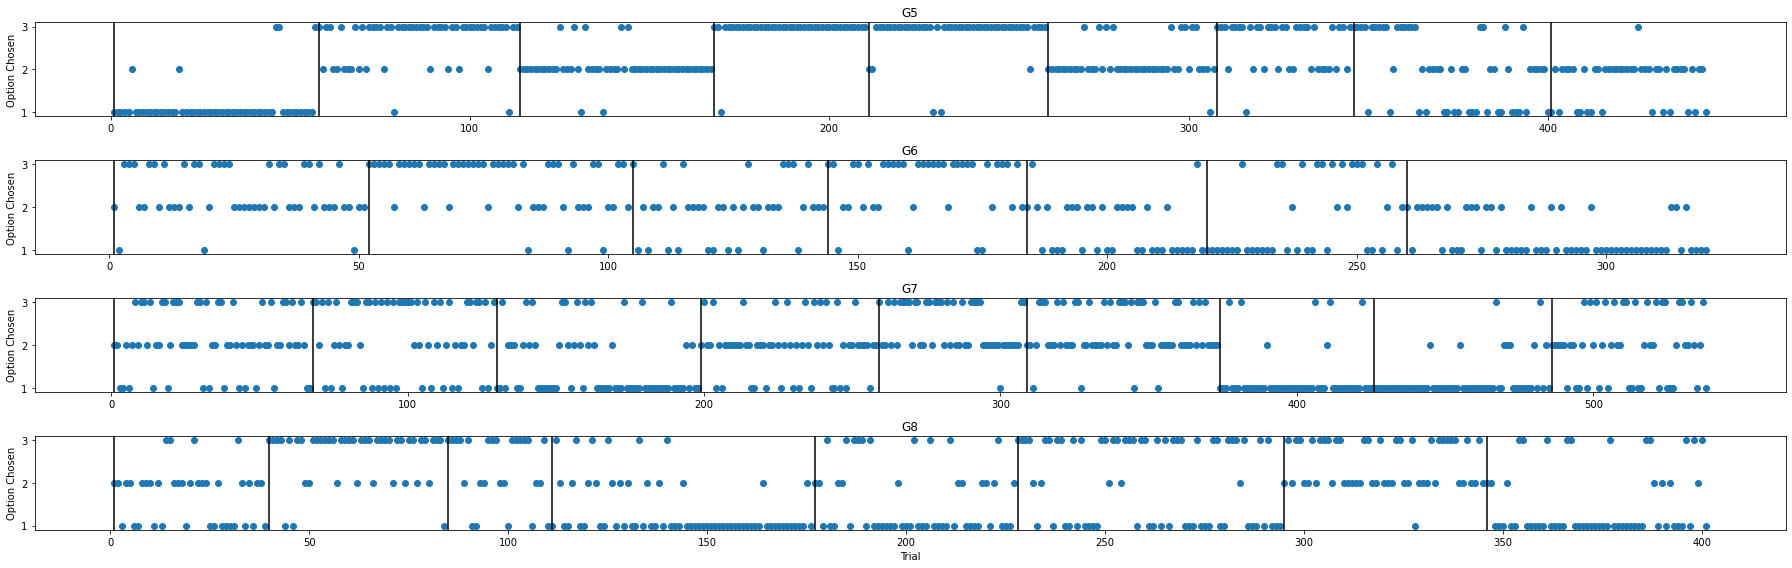

In [19]:
plt.figure(figsize=(25,8))

for (i, animal_id) in enumerate(ids):
    temp_df = animal_data[animal_data['animalID'] == animal_id]
    plt.subplot(len(ids), 1, i+1)
    plt.plot(
        temp_df['trialTotal'],
        temp_df['decisionNumber'],
        'o')
    for ses_start in temp_df['trialTotal'][temp_df['trial'] == 1]:
        plt.axvline(ses_start, color='black')
    plt.title(animal_id)
    plt.ylabel('Option Chosen')

plt.xlabel('Trial')
plt.tight_layout()
plt.savefig(f'../sample_data/plots/{path}/optionsByTrials.jpg')
plt.show()

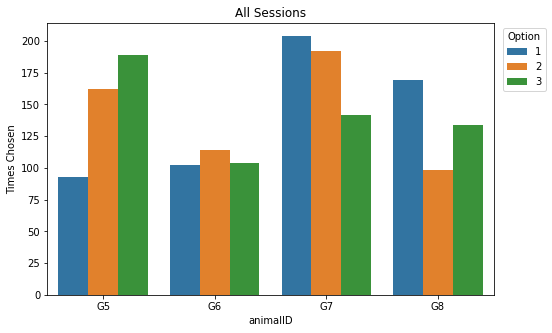

In [20]:
decision_counts = animal_data.groupby(['animalID', 'decisionNumber'], as_index=False)['trial'].count()

plt.figure(figsize=(8,5))
sns.barplot(data=decision_counts, x='animalID', y='trial', hue='decisionNumber')
plt.ylabel('Times Chosen')
plt.title('All Sessions')
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left", title='Option')
plt.savefig(f'../sample_data/plots/{path}/optionsTotal.jpg')
plt.show()

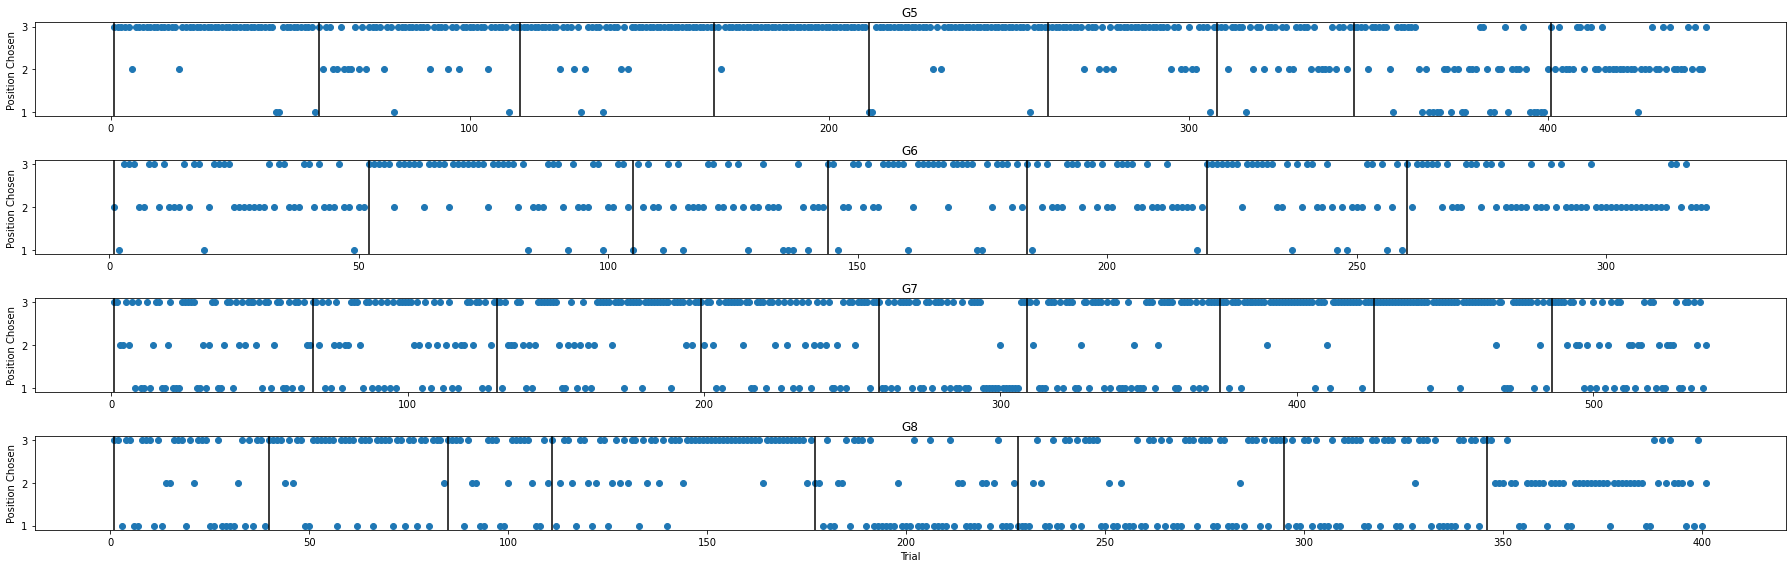

In [21]:
plt.figure(figsize=(25,8))

for (i, animal_id) in enumerate(ids):
    temp_df = animal_data[animal_data['animalID'] == animal_id]
    plt.subplot(len(ids), 1, i+1)
    plt.plot(
        temp_df['trialTotal'],
        temp_df['decisionPosition'],
        'o')
    for ses_start in temp_df['trialTotal'][temp_df['trial'] == 1]:
        plt.axvline(ses_start, color='black')
    plt.title(animal_id)
    plt.ylabel('Position Chosen')

plt.xlabel('Trial')
plt.tight_layout()
plt.savefig(f'../sample_data/plots/{path}/positionByTrials.jpg')
plt.show()

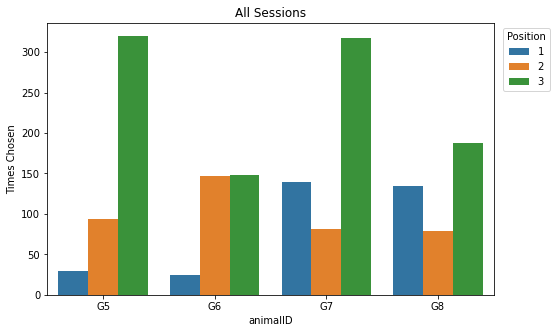

In [22]:
decision_counts = animal_data.groupby(['animalID', 'decisionPosition'], as_index=False)['trial'].count()

plt.figure(figsize=(8,5))
sns.barplot(data=decision_counts, x='animalID', y='trial', hue='decisionPosition')
plt.ylabel('Times Chosen')
plt.title('All Sessions')
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left", title='Position')
plt.savefig(f'../sample_data/plots/{path}/positionTotal.jpg')
plt.show()

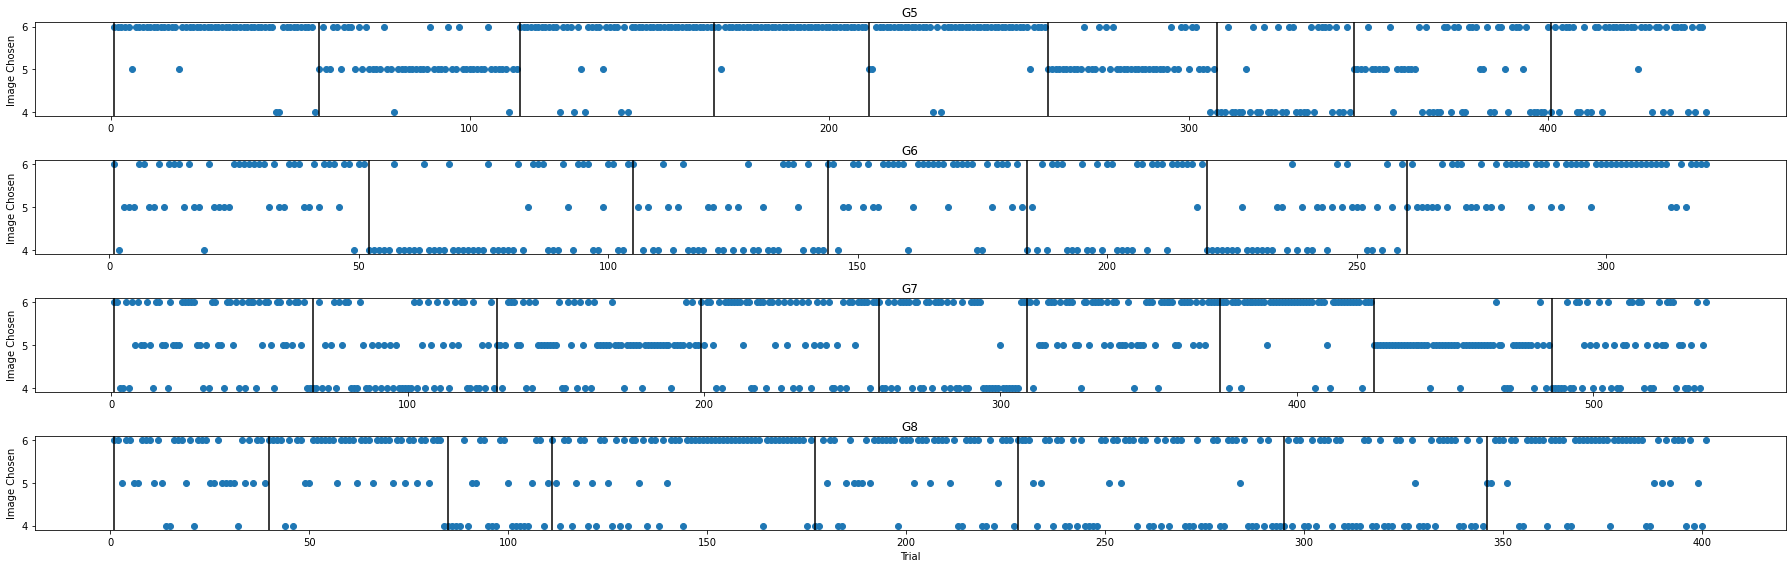

In [23]:
plt.figure(figsize=(25,8))

for (i, animal_id) in enumerate(ids):
    temp_df = animal_data[animal_data['animalID'] == animal_id]
    plt.subplot(len(ids), 1, i+1)
    plt.plot(
        temp_df['trialTotal'],
        temp_df['decisionImage'],
        'o')
    for ses_start in temp_df['trialTotal'][temp_df['trial'] == 1]:
        plt.axvline(ses_start, color='black')
    plt.title(animal_id)
    plt.ylabel('Image Chosen')

plt.xlabel('Trial')
plt.tight_layout()
plt.savefig(f'../sample_data/plots/{path}/imageByTrials.jpg')
plt.show()

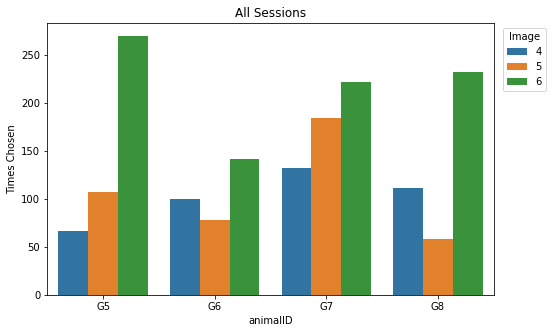

In [24]:
decision_counts = animal_data.groupby(['animalID', 'decisionImage'], as_index=False)['trial'].count()

plt.figure(figsize=(8,5))
sns.barplot(data=decision_counts, x='animalID', y='trial', hue='decisionImage')
plt.ylabel('Times Chosen')
plt.title('All Sessions')
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left", title='Image')
plt.savefig(f'../sample_data/plots/{path}/imageTotal.jpg')
plt.show()

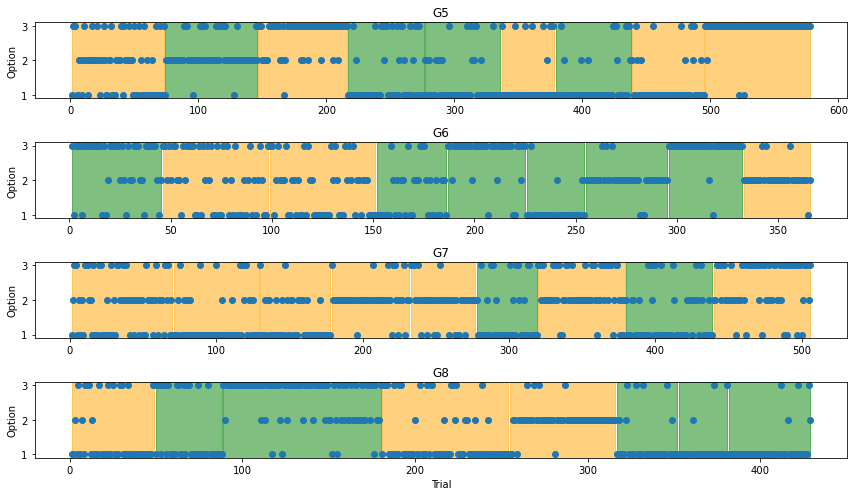

In [5]:
plt.figure(figsize=(12,7))

for (i, animal_id) in enumerate(ids):
    temp_df = animal_data[animal_data['animalID'] == animal_id]
    plt.subplot(len(ids), 1, i+1)
    plt.plot(
        temp_df['trialTotal'],
        temp_df['decisionNumber'],
        'o')
    for s in temp_df['session'].unique():
        first_trial = temp_df[(temp_df['session'] == s)]['trialTotal'].to_list()[0]
        last_trial = temp_df[(temp_df['session'] == s)]['trialTotal'].to_list()[-1]
        if temp_df[(temp_df['session'] == s)]['scenario'].to_list()[0] == 'Scenario 1':
            clr = 'green'
        else:
            clr = 'orange'
        plt.axvspan(first_trial, last_trial, color=clr, alpha=0.5)

    plt.title(animal_id)
    plt.ylabel('Option')

plt.xlabel('Trial')
plt.tight_layout()
# plt.savefig('../sample_data/plots/decisions.jpg')
plt.show()

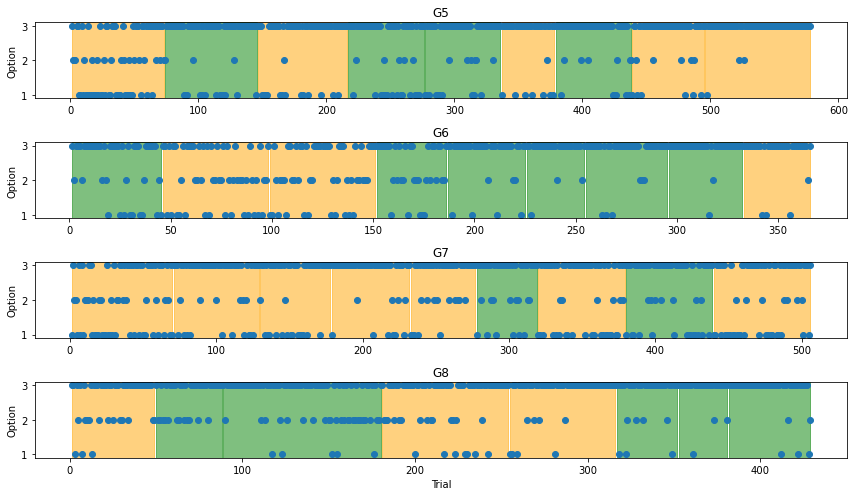

In [11]:
plt.figure(figsize=(12,7))

for (i, animal_id) in enumerate(ids):
    temp_df = animal_data[animal_data['animalID'] == animal_id]
    plt.subplot(len(ids), 1, i+1)
    plt.plot(
        temp_df['trialTotal'],
        temp_df['decisionPosition'],
        'o')
    for s in temp_df['session'].unique():
        first_trial = temp_df[(temp_df['session'] == s)]['trialTotal'].to_list()[0]
        last_trial = temp_df[(temp_df['session'] == s)]['trialTotal'].to_list()[-1]
        if temp_df[(temp_df['session'] == s)]['scenario'].to_list()[0] == 'Scenario 1':
            clr = 'green'
        else:
            clr = 'orange'
        plt.axvspan(first_trial, last_trial, color=clr, alpha=0.5)

    plt.title(animal_id)
    plt.ylabel('Option')

plt.xlabel('Trial')
plt.tight_layout()
# plt.savefig('../sample_data/plots/decisions.jpg')
plt.show()

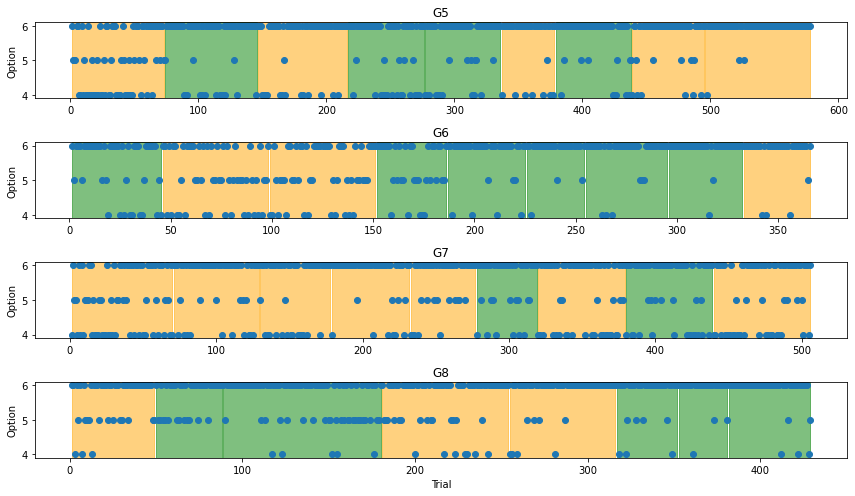

In [12]:
plt.figure(figsize=(12,7))

for (i, animal_id) in enumerate(ids):
    temp_df = animal_data[animal_data['animalID'] == animal_id]
    plt.subplot(len(ids), 1, i+1)
    plt.plot(
        temp_df['trialTotal'],
        temp_df['decisionImage'],
        'o')
    for s in temp_df['session'].unique():
        first_trial = temp_df[(temp_df['session'] == s)]['trialTotal'].to_list()[0]
        last_trial = temp_df[(temp_df['session'] == s)]['trialTotal'].to_list()[-1]
        if temp_df[(temp_df['session'] == s)]['scenario'].to_list()[0] == 'Scenario 1':
            clr = 'green'
        else:
            clr = 'orange'
        plt.axvspan(first_trial, last_trial, color=clr, alpha=0.5)

    plt.title(animal_id)
    plt.ylabel('Option')

plt.xlabel('Trial')
plt.tight_layout()
# plt.savefig('../sample_data/plots/decisions.jpg')
plt.show()

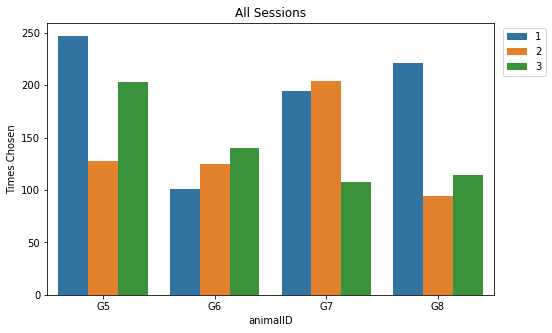

In [6]:
decision_counts = animal_data.groupby(['animalID', 'decisionNumber'], as_index=False)['trial'].count()

plt.figure(figsize=(8,5))
sns.barplot(data=decision_counts, x='animalID', y='trial', hue='decisionNumber')
plt.ylabel('Times Chosen')
plt.title('All Sessions')
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left")
plt.savefig('../sample_data/plots/decisionsCountTotal.jpg')
plt.show()

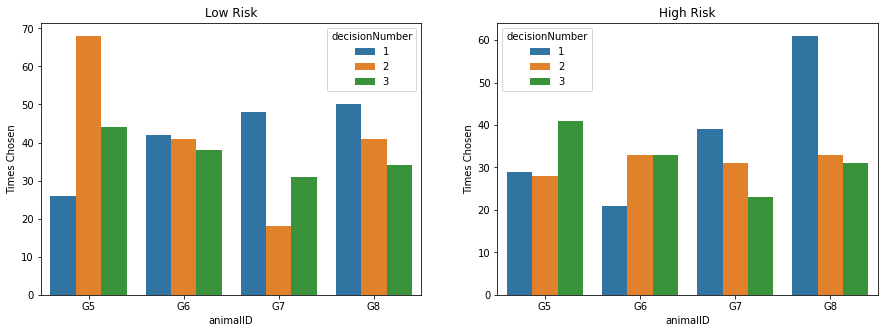

In [9]:
decision_counts = animal_data.groupby(['animalID', 'scenario', 'decisionNumber'], as_index=False)['trial'].count()

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(data=decision_counts[decision_counts['scenario'] == 'Scenario 1'],
            x='animalID', y='trial', hue='decisionNumber')
plt.ylabel('Times Chosen')
plt.title('Low Risk')

plt.subplot(122)
sns.barplot(data=decision_counts[decision_counts['scenario'] == 'Scenario 2'],
            x='animalID', y='trial', hue='decisionNumber')
plt.ylabel('Times Chosen')
plt.title('High Risk')
plt.savefig('../sample_data/plots/decisionsCountScenario.jpg')
plt.show()

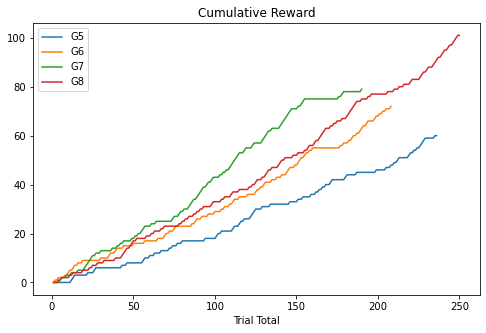

In [10]:
animal_data['rewardCumulative'] = animal_data.groupby('animalID')['reward'].cumsum()

plt.figure(figsize=(8,5))

for (i, animal_id) in enumerate(ids):
    plt.plot(
        animal_data[animal_data['animalID'] == animal_id]['trialTotal'],
        animal_data[animal_data['animalID'] == animal_id]['rewardCumulative'],
        label=animal_id)

plt.legend()
plt.xlabel('Trial Total')
plt.title('Cumulative Reward')
plt.savefig('../sample_data/plots/cumulativeReward.jpg')
plt.show()

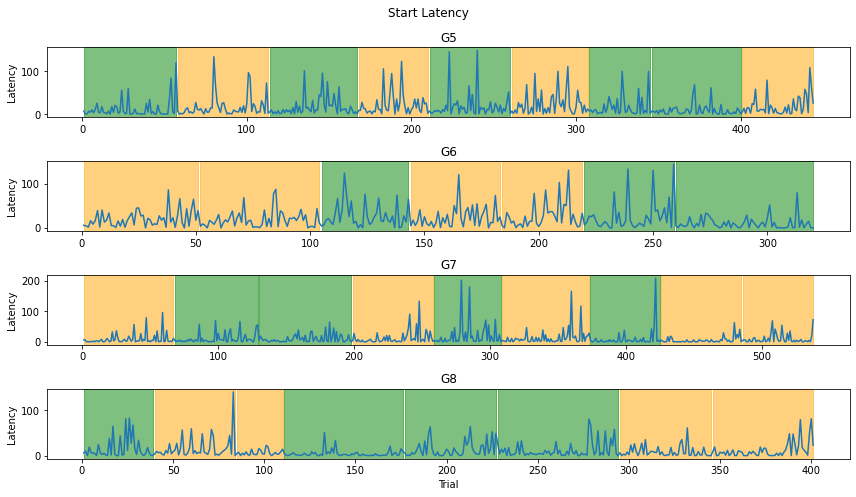

In [25]:
plt.figure(figsize=(12,7))

for (i, animal_id) in enumerate(ids):
    temp_df = animal_data[animal_data['animalID'] == animal_id]
    plt.subplot(len(ids), 1, i+1)
    plt.plot(
        temp_df['trialTotal'],
        temp_df['startLatency'])
    for s in temp_df['session'].unique():
        first_trial = temp_df[(temp_df['session'] == s)]['trialTotal'].to_list()[0]
        last_trial = temp_df[(temp_df['session'] == s)]['trialTotal'].to_list()[-1]
        if temp_df[(temp_df['session'] == s)]['scenario'].to_list()[0] == 'Scenario 1':
            clr = 'green'
        else:
            clr = 'orange'
        plt.axvspan(first_trial, last_trial, color=clr, alpha=0.5)

    plt.title(animal_id)
    # plt.ylim([0, 250])
    plt.ylabel('Latency')

plt.xlabel('Trial')
plt.suptitle('Start Latency')
plt.tight_layout()
# plt.savefig('../sample_data/plots/startLatency.jpg')
plt.show()

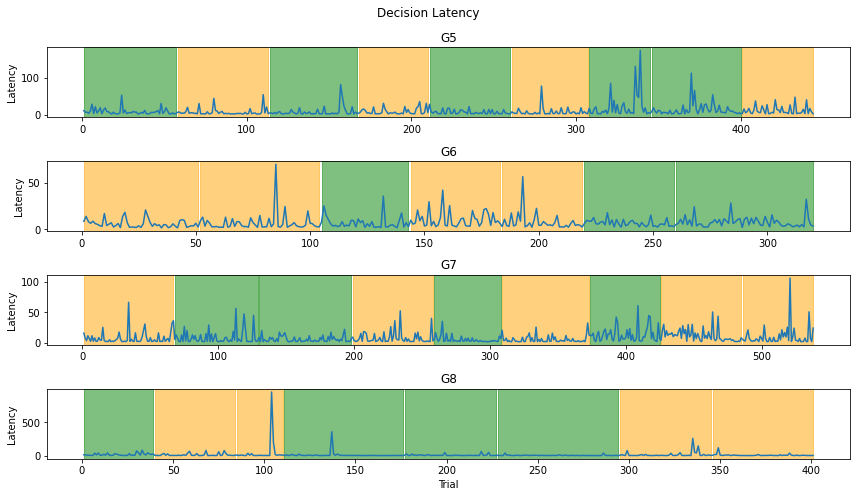

In [26]:
plt.figure(figsize=(12,7))

for (i, animal_id) in enumerate(ids):
    temp_df = animal_data[animal_data['animalID'] == animal_id]
    plt.subplot(len(ids), 1, i+1)
    plt.plot(
        temp_df['trialTotal'],
        temp_df['decisionLatency'])
    for s in temp_df['session'].unique():
        first_trial = temp_df[(temp_df['session'] == s)]['trialTotal'].to_list()[0]
        last_trial = temp_df[(temp_df['session'] == s)]['trialTotal'].to_list()[-1]
        if temp_df[(temp_df['session'] == s)]['scenario'].to_list()[0] == 'Scenario 1':
            clr = 'green'
        else:
            clr = 'orange'

        plt.axvspan(first_trial, last_trial, color=clr, alpha=0.5)

    plt.title(animal_id)
    plt.ylabel('Latency')
    # plt.legend(['Data', 'LR', 'HR'])

plt.xlabel('Trial')
plt.suptitle('Decision Latency')
plt.tight_layout()
# plt.savefig('../sample_data/plots/decisionLatency.jpg')
plt.show()

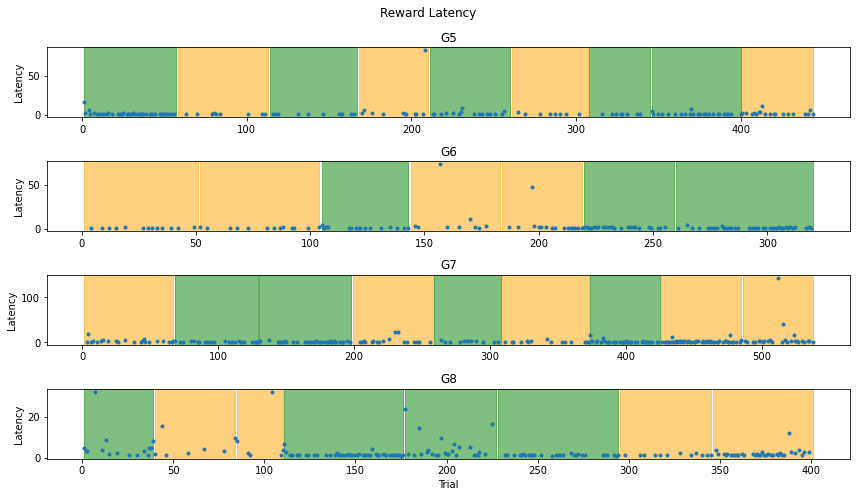

In [27]:
plt.figure(figsize=(12,7))

for (i, animal_id) in enumerate(ids):
    temp_df = animal_data[animal_data['animalID'] == animal_id]
    plt.subplot(len(ids), 1, i+1)
    plt.plot(
        temp_df['trialTotal'],
        temp_df['rewardLatency'],
        '.')
    for s in temp_df['session'].unique():
        first_trial = temp_df[(temp_df['session'] == s)]['trialTotal'].to_list()[0]
        last_trial = temp_df[(temp_df['session'] == s)]['trialTotal'].to_list()[-1]
        if temp_df[(temp_df['session'] == s)]['scenario'].to_list()[0] == 'Scenario 1':
            clr = 'green'
        else:
            clr = 'orange'
        plt.axvspan(first_trial, last_trial, color=clr, alpha=0.5)

    plt.title(animal_id)
    plt.ylabel('Latency')

plt.xlabel('Trial')
plt.suptitle('Reward Latency')
plt.tight_layout()
# plt.savefig('../sample_data/plots/rewardLatency.jpg')
plt.show()

# Win-stay lose-switch

In [30]:
animal_data['rewardLastTrial'] = np.NaN
animal_data['decisionLastTrial'] = np.NaN
for animal in ids:
    sessions = animal_data[animal_data['animalID'] == animal]['session'].unique()
    for s in sessions:
        cndt = (animal_data['animalID'] == animal) & (animal_data['session'] == s)
        animal_data.loc[cndt, 'rewardLastTrial'] = animal_data.loc[cndt, 'reward'].shift(periods=1)
        animal_data.loc[cndt, 'decisionLastTrial'] = animal_data.loc[cndt, 'decisionNumber'].shift(periods=1)

In [51]:
wsls_data = animal_data[~animal_data['rewardLastTrial'].isnull()].copy()

wsls_data['winStay'] = np.NaN
wsls_data['loseSwitch'] = np.NaN

cndt = wsls_data['rewardLastTrial'] == True
wsls_data.loc[cndt, 'winStay'] = (wsls_data.loc[cndt, 'decisionNumber'] == wsls_data.loc[cndt, 'decisionLastTrial'])

cndt = wsls_data['rewardLastTrial'] == False
wsls_data.loc[cndt, 'loseSwitch'] = (wsls_data.loc[cndt, 'decisionNumber'] != wsls_data.loc[cndt, 'decisionLastTrial'])

In [58]:
wsls = wsls_data.groupby(['animalID', 'scenario'], as_index=False).agg(
    {'winStay': lambda x: x.mean(skipna=True),
     'loseSwitch': lambda x: x.mean(skipna=True)}
)
wsls

,animalID,scenario,winStay,loseSwitch
0,G5,Scenario 1,0.448276,0.475728
1,G5,Scenario 2,0.466667,0.421875
2,G6,Scenario 1,0.400000,0.628571
3,G6,Scenario 2,0.166667,0.677966
4,G7,Scenario 1,0.702703,0.660714
5,G7,Scenario 2,0.631579,0.705882
6,G8,Scenario 1,0.377778,0.666667
7,G8,Scenario 2,0.615385,0.573529


In [63]:
wsls_all = wsls_data.groupby('animalID', as_index=False).agg(
    {'winStay': lambda x: x.mean(skipna=True),
     'loseSwitch': lambda x: x.mean(skipna=True)}
)
wsls_all

,animalID,winStay,loseSwitch
0,G5,0.457627,0.455090
1,G6,0.318841,0.651163
2,G7,0.666667,0.682243
3,G8,0.505155,0.622378


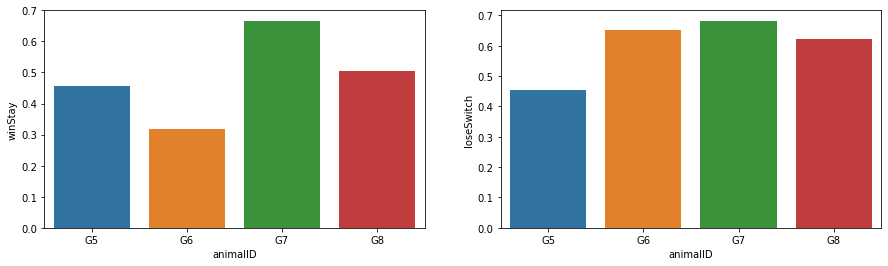

In [65]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.barplot(
    data=wsls_all, x='animalID',
    y='winStay')

plt.subplot(122)
sns.barplot(
    data=wsls_all, x='animalID',
    y='loseSwitch')

plt.savefig('../sample_data/plots/WSLS_all.jpg')
plt.show()

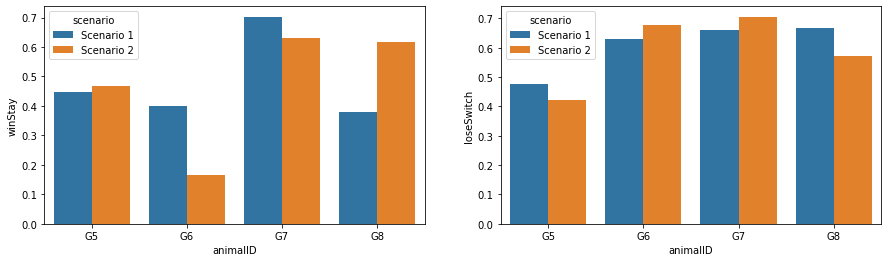

In [62]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.barplot(
    data=wsls, x='animalID',
    y='winStay', hue='scenario')

plt.subplot(122)
sns.barplot(
    data=wsls, x='animalID',
    y='loseSwitch', hue='scenario')

plt.savefig('../sample_data/plots/WSLS.jpg')
plt.show()

# Modeling

In [14]:
def log_lik(x, *args):
    """
    Sum of negative log likelihoods over all trials.

    Arguments
    ----------
    x : tuple, list
        Parameters to estimate by MLE fit.

    args: tuple, list
        Input parameters for the model.

    Returns
    ----------
        Sum of negative log likelihoods.
    """

    alpha_pos, alpha_neg, beta = x # parameters to estimate
    n_arms, actions, reward = args # input values

    Q = np.ones(shape=(n_arms,))

    log_prob_actions = np.zeros(shape=(len(actions), n_arms))

    for i, (a, r) in enumerate(zip(actions, reward)):

        log_prob_action = log_softmax(beta*Q)
        log_prob_actions[i] = log_prob_action[a]

        if r == 1:
            Q[a] += alpha_pos * (r - Q[a])
        else:
            Q[a] += alpha_neg * (r - Q[a])

    return -np.sum(log_prob_actions)

In [15]:
n_arms = 3
x0 = [0.5, 0.6, 2]

In [16]:
cond = animal_data['animalID'] == 'G5'
actions = (animal_data[cond]['decisionNumber'] - 1).to_list()
reward = animal_data[cond]['reward'].to_list()
reward = list(map(lambda x: int(x), reward))

result = minimize(
    fun=log_lik, x0=x0,
    method='L-BFGS-B', # Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm
    args=(n_arms, actions, reward),
    bounds=((0, 1), (0, 1), (0, 8)),
    options={'gtol': 1e-08})

result

      fun: 777.8175003770216
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0., 0., 0.])

In [17]:
cond = animal_data['animalID'] == 'G6'
actions = (animal_data[cond]['decisionNumber'] - 1).to_list()
reward = animal_data[cond]['reward'].to_list()
reward = list(map(lambda x: int(x), reward))

result = minimize(
    fun=log_lik, x0=x0,
    method='L-BFGS-B', # Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm
    args=(n_arms, actions, reward),
    bounds=((0, 1), (0, 1), (0, 8)),
    options={'gtol': 1e-08})

result

      fun: 685.5340681289003
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0., 0., 0.])

In [18]:
cond = animal_data['animalID'] == 'G7'
actions = (animal_data[cond]['decisionNumber'] - 1).to_list()
reward = animal_data[cond]['reward'].to_list()
reward = list(map(lambda x: int(x), reward))

result = minimize(
    fun=log_lik, x0=x0,
    method='L-BFGS-B', # Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm
    args=(n_arms, actions, reward),
    bounds=((0, 1), (0, 1), (0, 8)))

result

      fun: 594.3695992358063
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.95807864e-05, -3.41060511e-05, -3.41060515e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 116
      nit: 20
     njev: 29
   status: 0
  success: True
        x: array([0.29330427, 0.57818632, 1.15218048])

In [19]:
cond = animal_data['animalID'] == 'G8'
actions = (animal_data[cond]['decisionNumber'] - 1).to_list()
reward = animal_data[cond]['reward'].to_list()
reward = list(map(lambda x: int(x), reward))

result = minimize(
    fun=log_lik, x0=x0,
    method='L-BFGS-B', # Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm
    args=(n_arms, actions, reward),
    bounds=((0, 1), (0, 1), (0, 8))
)

result

      fun: 815.232752082228
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.22959454e-04, -1.30796206e+02,  1.13686838e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 15
     njev: 24
   status: 0
  success: True
        x: array([0.00732568, 1.        , 5.51897761])